In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
filename = '/content/drive/MyDrive/meat.txt'

data = pd.read_csv(filename, sep=',')
data

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
822,2012-07-01,2200.8,9.5,1721.8,12.5,3127.0,43.4,497.2
823,2012-08-01,2367.5,10.1,1997.9,14.2,3317.4,51.0,530.1
824,2012-09-01,2016.0,8.8,1911.0,12.5,2927.1,43.7,453.1
825,2012-10-01,2343.7,10.3,2210.4,14.2,3335.0,43.8,579.9


In [ ]:
data = data.drop(columns = ['date'])
data

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,681.0,106.0,1029.0,78.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
822,2200.8,9.5,1721.8,12.5,3127.0,43.4,497.2
823,2367.5,10.1,1997.9,14.2,3317.4,51.0,530.1
824,2016.0,8.8,1911.0,12.5,2927.1,43.7,453.1
825,2343.7,10.3,2210.4,14.2,3335.0,43.8,579.9


In [ ]:
data_cleaned = data.dropna()
data_cleaned

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
684,2205.0,18.0,1693.0,19.0,2622.2,42.7,461.2
685,1881.0,16.0,1486.0,17.0,2322.2,39.7,409.3
686,2096.0,16.0,1626.0,23.0,2588.6,44.4,462.0
687,1939.0,15.0,1533.0,20.0,2515.7,42.2,428.8
688,2294.0,16.0,1555.0,17.0,2835.6,45.6,488.3
...,...,...,...,...,...,...,...
822,2200.8,9.5,1721.8,12.5,3127.0,43.4,497.2
823,2367.5,10.1,1997.9,14.2,3317.4,51.0,530.1
824,2016.0,8.8,1911.0,12.5,2927.1,43.7,453.1
825,2343.7,10.3,2210.4,14.2,3335.0,43.8,579.9


In [ ]:
scaler = MinMaxScaler()
data['beef'] = scaler.fit_transform(data['beef'].values.reshape(-1,1))
data['beef']

0      0.179404
1      0.161696
2      0.174744
3      0.132339
4      0.146785
         ...   
822    0.854986
823    0.932665
824    0.768872
825    0.921575
826    0.857689
Name: beef, Length: 827, dtype: float64

In [ ]:
train_size = int(len(data)*0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [ ]:
def create_sequence(data,sequence_length):
  X,y = [],[]
  for i in range(len(data) - sequence_length):
    X.append(data[i: i + sequence_length])
    y.append(data[i+sequence_length])

  return np.array(X), np.array(y)


sequence_length = 10

X_train, y_train = create_sequence(train_data['beef'].values,sequence_length)
X_test, y_test = create_sequence(test_data['beef'].values, sequence_length)




# Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM


model = Sequential()
model.add(LSTM(50, activation='relu',input_shape=(sequence_length,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(X_train,y_train,epochs=50, batch_size=64)


Epoch 1/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 8/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 10/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 11/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 12/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 13/50
11/11 [=============================

In [ ]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)


#y_test = scaler.inverse_transform(y_test)



5/5 [==============================] - 0s 3ms/step


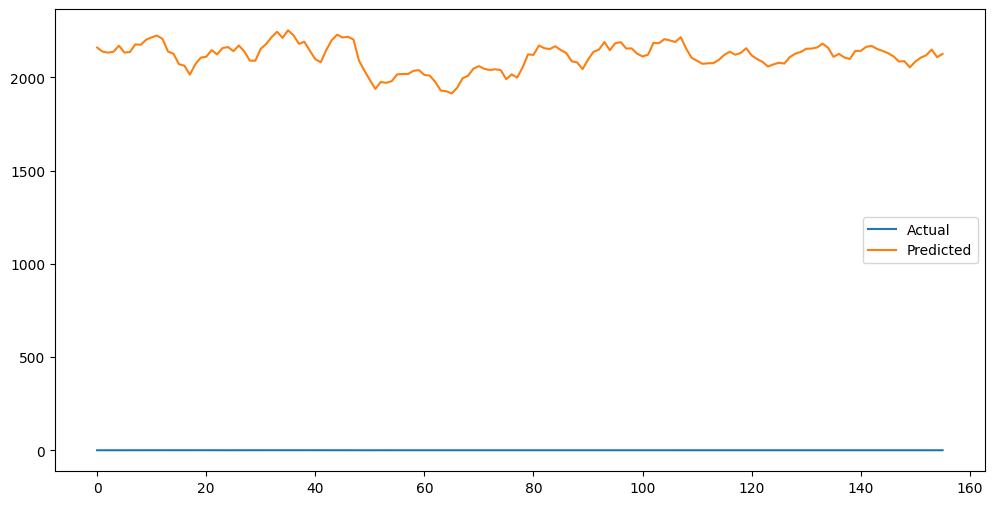

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()